# Urban Computing - Virtual workgroup 01/10/2020

## Part 1: Creating a .pdf and .html of your notebook

For assignment 2, it is **mandatory** to hand in a .pdf and a .html version of your Python notebooks. This will be explained in this following section.

### Creating a .html export
To export your notebook as .html, simply go to File -> Download as -> HTML (.html). See screenshot below.
You don't need any extra packages to do this.

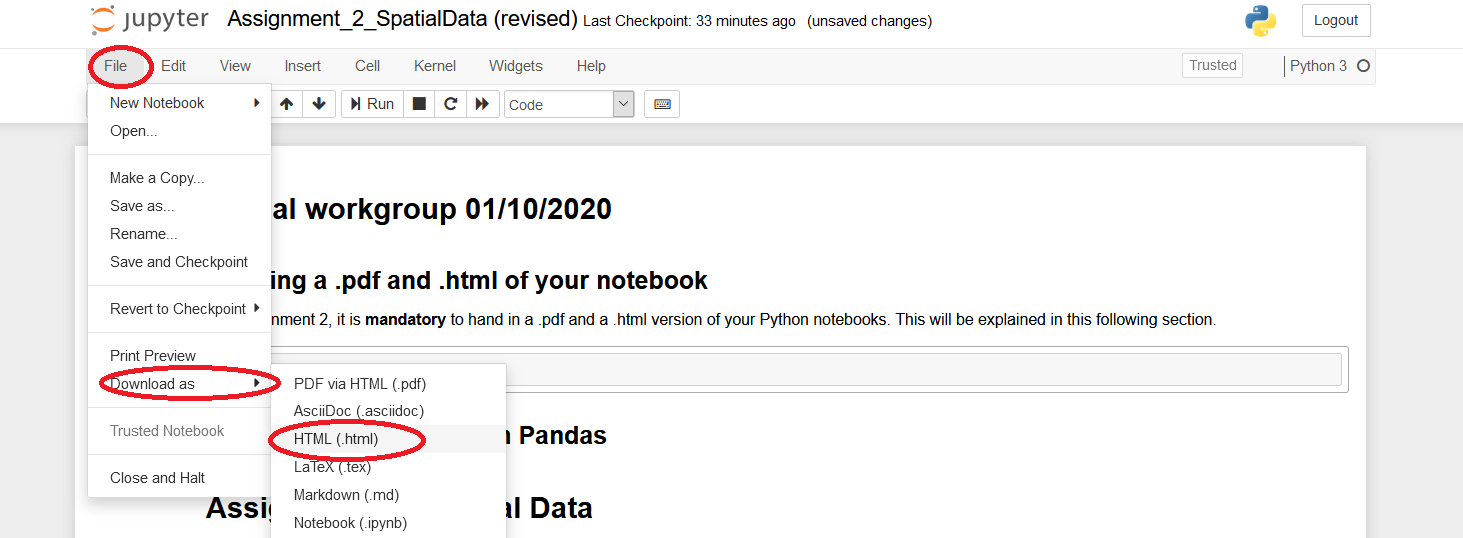

### Creating a .pdf export
There are two ways to create a .pdf export of your notebook: via LaTeX and via HTML.

#### Option 1
The easiest option is to use via HTML, this requires some packages to be installed via pip. Run the commands below (by using a "!", you can run console commands through a Jupyter notebook).

In [161]:
!pip install -U notebook-as-pdf
!pyppeteer-install

Requirement already up-to-date: notebook-as-pdf in c:\users\victo\appdata\local\continuum\anaconda3\lib\site-packages (0.3.1)


[W:pyppeteer.command] chromium is already installed.


If you explicitly use pip3, the command looks a bit differently:

In [3]:
# Uncomment if applicable
# !pip3 install -U notebook-as-pdf
# !pyppeteer-install

After successfully installing these packages, reload your notebook. Afterwards, there should be a new menu option File -> Download as -> PDF via HTML (.pdf)

#### Option 2
The other way to export notebooks as .pdf is to use nbconvert. For instructions on how to use nbconvert, see the documentation on https://nbconvert.readthedocs.io/en/latest/.

## Part 2: Basic Pandas
For assignment 2, you will most likely work with tabular data. Pandas is a great tool to work with this kind of data. Here, we will discuss some basic operations with Pandas. Note that this will also work for geopandas.

In [37]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### Import data from Excel or CSV

To load a dataset from a csv, we can use the read_csv() function of Pandas. For this example, we will use a dataset consisting of statistics about the spread of Covid-19 in the Netherlands.

In [163]:
# Create dataframe by reading CSV file
df = pd.read_csv("Netherlands.csv")

# If you have an excel file, use read_excel instead
# df = pd.read_excel("Netherlands.xls")

# head() shows the first 5 entries
df.head()

This dataset describes Covid-19 cases in the Netherlands.  Unnamed: 1  \
0                   Created for workgroup 01-10-2020                NaN   
1                                                Idx               Date   
2                                                141         2020-02-27   
3                                                178         2020-02-28   
4                                                179         2020-02-28   

  Unnamed: 2   Unnamed: 3     Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN          NaN            NaN        NaN        NaN   
1       iso3  CountryName         Region        lat        lon   
2        NLD  Netherlands  North Brabant  51.527534   5.590194   
3        NLD  Netherlands  North Brabant  51.527534   5.590194   
4        NLD  Netherlands  North Holland  52.551824   4.876581   

           Unnamed: 7          Unnamed: 8           Unnamed: 9  \
0                 NaN                 NaN                  NaN   
1  CumulativePositive  CumulativeDeceased  CumulativeRecovered   
2                   1                 NaN                  NaN   
3                   1                 NaN                  NaN   
4                   1                 NaN                  NaN   

         Unnamed: 10   Unnamed: 11    Unnamed: 12 Unnamed: 13   Unnamed: 14  \
0                NaN           NaN            NaN         NaN           NaN   
1  CurrentlyPositive  Hospitalized  IntensiveCare   EUcountry  EUCPMcountry   
2                  1           NaN            NaN        TRUE          TRUE   
3                  1           NaN            NaN        TRUE          TRUE   
4                  1           NaN            NaN        TRUE          TRUE   

  Unnamed: 15  
0         NaN  
1        NUTS  
2        NL41  
3        NL41  
4        NL32

The result is not exactly what we're looking for... So, what went wrong?
Many datasets on the internet have use the first few rows to describe what is in the dataset. When reading the dataset in Pandas, we want to skip these rows.

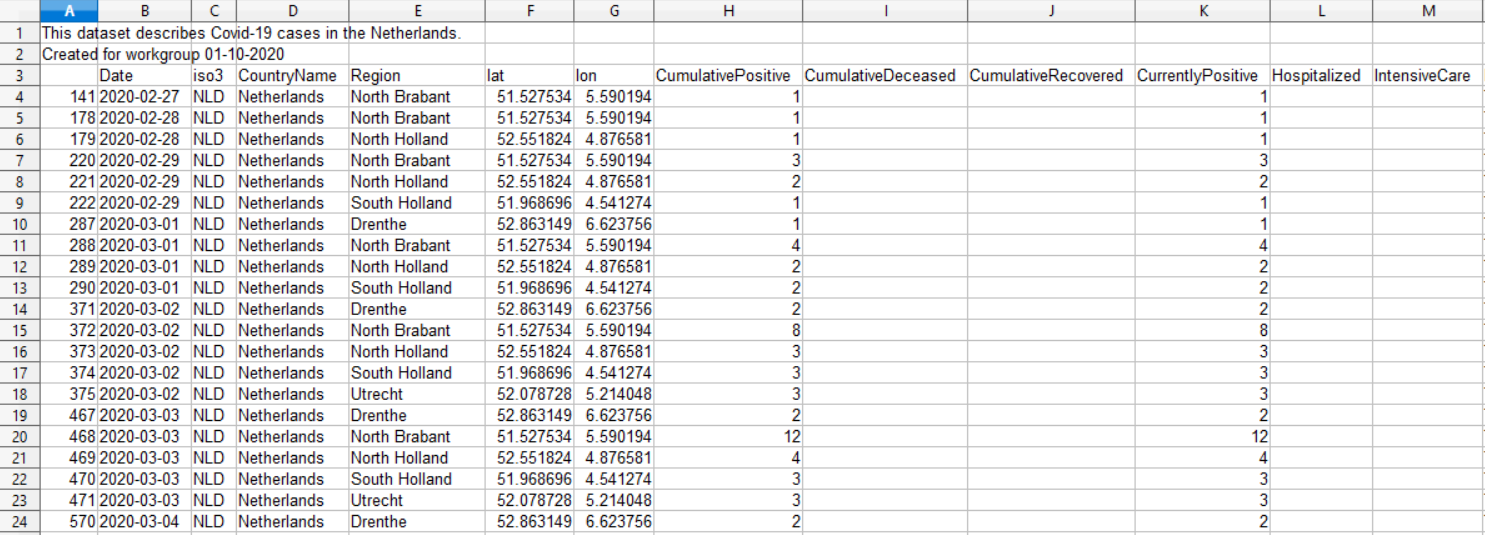

In [164]:
# We skip the first two rows with the skiprows argument. We can do the same for the last rows using skipfooter.
df = pd.read_csv("Netherlands.csv", skiprows=2, skipfooter=0)
df.head()

Idx        Date iso3  CountryName         Region        lat       lon  \
0  141  2020-02-27  NLD  Netherlands  North Brabant  51.527534  5.590194   
1  178  2020-02-28  NLD  Netherlands  North Brabant  51.527534  5.590194   
2  179  2020-02-28  NLD  Netherlands  North Holland  52.551824  4.876581   
3  220  2020-02-29  NLD  Netherlands  North Brabant  51.527534  5.590194   
4  221  2020-02-29  NLD  Netherlands  North Holland  52.551824  4.876581   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
0                   1                 NaN                  NaN   
1                   1                 NaN                  NaN   
2                   1                 NaN                  NaN   
3                   3                 NaN                  NaN   
4                   2                 NaN                  NaN   

   CurrentlyPositive  Hospitalized  IntensiveCare  EUcountry  EUCPMcountry  \
0                  1           NaN            NaN       True          True   
1                  1           NaN            NaN       True          True   
2                  1           NaN            NaN       True          True   
3                  3           NaN            NaN       True          True   
4                  2           NaN            NaN       True          True   

   NUTS  
0  NL41  
1  NL41  
2  NL32  
3  NL41  
4  NL32

### Dataset exploration and cleaning
We can get some basic statistics by using the describe function.

In [165]:
df.describe()

# Note that some columns will be missing, describe only works for numerical data.

Idx          lat          lon  CumulativePositive  \
count   2554.000000  2426.000000  2426.000000         2554.000000   
mean   44548.293265    52.231885     5.583469         3807.296398   
std    27867.122656     0.639359     0.832681         4771.315606   
min      141.000000    51.207579     3.786651            0.000000   
25%    20355.250000    51.527534     4.876581          531.250000   
50%    44382.500000    52.078728     5.590194         1475.500000   
75%    68460.750000    52.551824     5.945178         5878.000000   
max    93488.000000    53.291466     6.700488        36445.000000   

       CumulativeDeceased  CumulativeRecovered  CurrentlyPositive  \
count         2425.000000               1573.0        2554.000000   
mean           411.000825                  0.0        3417.054816   
std           1124.773386                  0.0        4799.343183   
min              0.000000                  0.0       -6138.000000   
25%              0.000000                  0.0         520.250000   
50%              0.000000                  0.0        1425.500000   
75%            312.000000                  0.0        5621.750000   
max           6138.000000                  0.0       35032.000000   

       Hospitalized  IntensiveCare  
count   2374.000000         1522.0  
mean     705.658382            0.0  
std     2047.597200            0.0  
min        0.000000            0.0  
25%        0.000000            0.0  
50%        0.000000            0.0  
75%      277.000000            0.0  
max    11898.000000            0.0

In [60]:
list(df.columns)

['Idx',
 'Date',
 'iso3',
 'CountryName',
 'Region',
 'lat',
 'lon',
 'CumulativePositive',
 'CumulativeDeceased',
 'CumulativeRecovered',
 'CurrentlyPositive',
 'Hospitalized',
 'IntensiveCare',
 'EUcountry',
 'EUCPMcountry',
 'NUTS']

We won't be needing all columns, therefore we drop columns that we don't need anymore.

In [166]:
cols_to_drop = ['Idx',
                'iso3',
                'CountryName',
                'lat',
                'lon',
                'EUcountry',
                'EUCPMcountry',
                'NUTS'
                ]

df = df.drop(columns=cols_to_drop)
df.head()

Date         Region  CumulativePositive  CumulativeDeceased  \
0  2020-02-27  North Brabant                   1                 NaN   
1  2020-02-28  North Brabant                   1                 NaN   
2  2020-02-28  North Holland                   1                 NaN   
3  2020-02-29  North Brabant                   3                 NaN   
4  2020-02-29  North Holland                   2                 NaN   

   CumulativeRecovered  CurrentlyPositive  Hospitalized  IntensiveCare  
0                  NaN                  1           NaN            NaN  
1                  NaN                  1           NaN            NaN  
2                  NaN                  1           NaN            NaN  
3                  NaN                  3           NaN            NaN  
4                  NaN                  2           NaN            NaN

Let's check which regions are included in this dataset.

In [167]:
df["Region"].unique()

array(['North Brabant', 'North Holland', 'South Holland', 'Drenthe',
       'Utrecht', 'Gelderland', 'Flevoland', 'Limburg', 'NOT SPECIFIED',
       'Overijssel', 'Zeeland', 'Friesland', 'Groningen'], dtype=object)

There's also a lot of missing data (NaN) in this .csv, we could fill these cells with zeros.

In [170]:
df = df.fillna(0)
df.head()

Date         Region  CumulativePositive  CumulativeDeceased  \
0  2020-02-27  North Brabant                   1                 0.0   
1  2020-02-28  North Brabant                   1                 0.0   
2  2020-02-28  North Holland                   1                 0.0   
3  2020-02-29  North Brabant                   3                 0.0   
4  2020-02-29  North Holland                   2                 0.0   

   CumulativeRecovered  CurrentlyPositive  Hospitalized  IntensiveCare  
0                  0.0                  1           0.0            0.0  
1                  0.0                  1           0.0            0.0  
2                  0.0                  1           0.0            0.0  
3                  0.0                  3           0.0            0.0  
4                  0.0                  2           0.0            0.0

Now that we've solved the missing data issue, we can make simple plots of this dataframe.

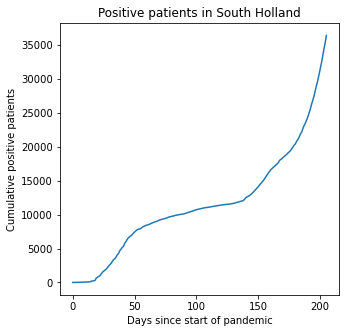

In [173]:
data = df[df["Region"]=="South Holland"].reset_index()

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(data.index, data["CumulativePositive"])
ax.set_xlabel("Days since start of pandemic")
ax.set_ylabel("Cumulative positive patients")
ax.set_title("Positive patients in South Holland")
plt.show()

We could also compare several plots next to each other:

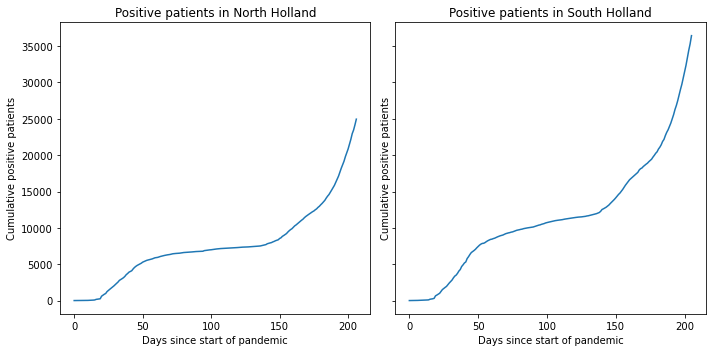

In [175]:
# Create 1 row, 2 columns of subplots
fig, ax = plt.subplots(1,2, figsize=(10, 5), sharey=True)

regions = ["North Holland", "South Holland"]

for i, region in enumerate(regions):
    data = df[df["Region"]==region].reset_index()
    ax[i].plot(data.index, data["CumulativePositive"])
    ax[i].set_xlabel("Days since start of pandemic")
    ax[i].set_ylabel("Cumulative positive patients")
    ax[i].set_title("Positive patients in {}".format(region))

plt.tight_layout()
plt.show()

Or within one plot:

In [155]:
fig, ax = plt.subplots(figsize=(5, 5))

regions = ["North Holland", "South Holland"]

for region in regions:
    data = df[df["Region"]==region].reset_index()
    ax.plot(data.index, data["CumulativePositive"], label=region)

ax.set_xlabel("Days since start of pandemic")
ax.set_ylabel("Cumulative positive patients")
ax.set_title("Positive patients")
ax.legend()

plt.tight_layout()
plt.show()

In [160]:
# You can also directly plot a dataframe or series object

fig, ax = plt.subplots()

data = df[df["Region"]=="North Holland"].reset_index()

data["CumulativePositive"].plot()
plt.show()

### Merging dataframes
Most likely, you will want to work with several different data sources. Therefore, you will need to combine several tables into one dataframe. Let's consider a second dataset, describing Covid-19 infections in Germany. We will pre-process this dataset in the same way.

In [176]:
# Load data
df_germany = pd.read_csv("Germany.csv", skiprows=0, skipfooter=0)

# Drop columns
cols_to_drop = ['Idx',
                'iso3',
                'CountryName',
                'lat',
                'lon',
                'EUcountry',
                'EUCPMcountry',
                'NUTS'
                ]

df_germany = df_germany.drop(columns=cols_to_drop)

# Fill missing data with 0
df_germany = df_germany.fillna(0)

# Show first 5 rows
df_germany.head()

Date               Region  CumulativePositive  CumulativeDeceased  \
0  2020-02-29    Baden-Württemberg                  14                 0.0   
1  2020-02-29               Bayern                  15                 0.0   
2  2020-02-29               Hessen                   3                 0.0   
3  2020-02-29  Nordrhein-Westfalen                  30                 0.0   
4  2020-02-29         Repatriierte                   2                 0.0   

   CumulativeRecovered  CurrentlyPositive  Hospitalized  IntensiveCare  
0                  0.0                 14           0.0            0.0  
1                  0.0                 15           0.0            0.0  
2                  0.0                  3           0.0            0.0  
3                  0.0                 30           0.0            0.0  
4                  0.0                  2           0.0            0.0

Now we have a clean dataframe for Germany, let's merge it with the data for the Netherlands. As we have identical columns, we can simply concatenate the dataframes.

In [100]:
df_merged = pd.concat([df, df_germany])

In [177]:
df_merged.head()

Date         Region  CumulativePositive  CumulativeDeceased  \
0  2020-02-27  North Brabant                   1                 0.0   
1  2020-02-28  North Brabant                   1                 0.0   
2  2020-02-28  Noord-Holland                   1                 0.0   
3  2020-02-29  North Brabant                   3                 0.0   
4  2020-02-29  Noord-Holland                   2                 0.0   

   CumulativeRecovered  CurrentlyPositive  Hospitalized  IntensiveCare  
0                  0.0                  1           0.0            0.0  
1                  0.0                  1           0.0            0.0  
2                  0.0                  1           0.0            0.0  
3                  0.0                  3           0.0            0.0  
4                  0.0                  2           0.0            0.0

In [178]:
df_merged.tail()

Date              Region  CumulativePositive  CumulativeDeceased  \
3599  2020-09-30            Saarland                3297               177.0   
3600  2020-09-30             Sachsen                7202               234.0   
3601  2020-09-30      Sachsen-Anhalt                2619                68.0   
3602  2020-09-30  Schleswig Holstein                4772               162.0   
3603  2020-09-30           Thüringen                4075               191.0   

      CumulativeRecovered  CurrentlyPositive  Hospitalized  IntensiveCare  
3599                  0.0               3120           0.0            0.0  
3600                  0.0               6968           0.0            0.0  
3601                  0.0               2551           0.0            0.0  
3602                  0.0               4610           0.0            0.0  
3603                  0.0               3884           0.0            0.0

Often, joining two dataframes won't be this simple. For other cases of joining dataframes, take a look at the documentation at https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html. 

Many times, you will also run into spelling issues (countries aren't spelled in the same way in different datasets). To easily replace values in a dataframe, you can do the following:

In [131]:
names_to_replace = {
                    "North Holland":"Noord-Holland",
                    "South Holland":"Zuid-Holland"
}

df_merged["Region"].replace(names_to_replace, inplace=True)

In [179]:
df_merged["Region"].unique()

array(['North Brabant', 'Noord-Holland', 'Zuid-Holland', 'Drenthe',
       'Utrecht', 'Gelderland', 'Flevoland', 'Limburg', 'NOT SPECIFIED',
       'Overijssel', 'Zeeland', 'Friesland', 'Groningen',
       'Baden-Württemberg', 'Bayern', 'Hessen', 'Nordrhein-Westfalen',
       'Repatriierte', 'Rheinland-Pfalz', 'Schleswig Holstein', 'Bremen',
       'Hamburg', 'Niedersachsen', 'Berlin', 'Brandenburg', 'Sachsen',
       'Thüringen', 'Mecklenburg-Vorpommern', 'Saarland',
       'Sachsen-Anhalt'], dtype=object)

### Groupby operations
One of the powerful tools Pandas incorporates is the ability to perform groupby operations. For example, let's say we want to know which region has the highest cumulative amount of hospitalizations (ignoring the fact that people spend several days in a hospital). 

In [104]:
groups = df_merged["Hospitalized"].groupby(df_merged["Region"])

In [105]:
groups

In [126]:
cumulative_hosp = groups.sum().sort_values(ascending=False)
cumulative_hosp

Region
NOT SPECIFIED             811719.0
North Brabant             198749.0
South Holland             164394.0
North Holland             121926.0
Limburg                   111905.0
Gelderland                108638.0
Utrecht                    64983.0
Overijssel                 39226.0
Flevoland                  19545.0
Zeeland                    10941.0
Friesland                   9386.0
Drenthe                     8467.0
Groningen                   5354.0
Rheinland-Pfalz                0.0
Bayern                         0.0
Berlin                         0.0
Brandenburg                    0.0
Bremen                         0.0
Thüringen                      0.0
Schleswig Holstein             0.0
Repatriierte                   0.0
Hamburg                        0.0
Hessen                         0.0
Sachsen-Anhalt                 0.0
Mecklenburg-Vorpommern         0.0
Sachsen                        0.0
Niedersachsen                  0.0
Nordrhein-Westfalen            0.0
Saarland     

Text is not always the best format to visualize your data. So, let's plot this in a bar chart, showing only the top 10 regions.

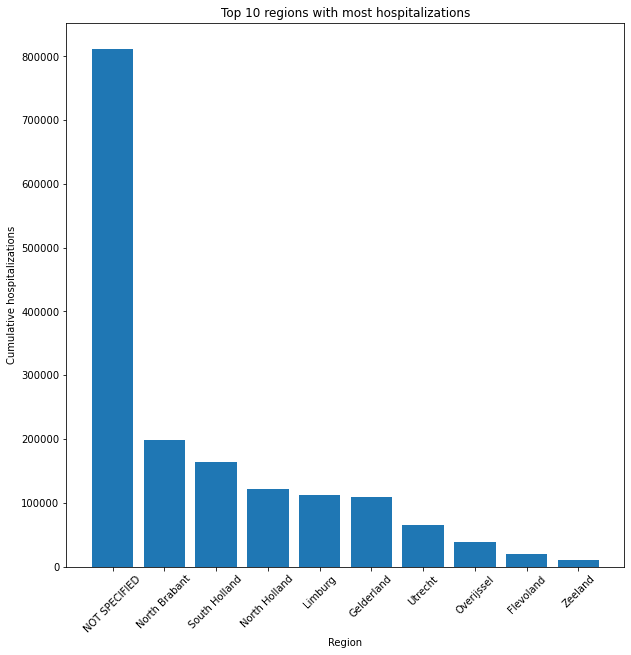

In [153]:
# Select first 10 elements
top10 = cumulative_hosp[:10]

fig, ax = plt.subplots(figsize=(10,10))

# Rotate x tick labels by 45 degrees
ax.set_xticklabels(top10.index, rotation = 45)

# Make a bar plot with index on x axis and values on y axis
ax.bar(top10.index, top10.values)

# Set labels
ax.set_title("Top 10 regions with most hospitalizations")
ax.set_xlabel("Region")
ax.set_ylabel("Cumulative hospitalizations")

plt.show()

We can also get other statistics of these groups, by using aggregate functions.

In [147]:
agg = groups.aggregate(["sum", "mean", "min", "max"])
agg

sum         mean  min      max
Region                                                     
Baden-Württemberg            0.0     0.000000  0.0      0.0
Bayern                       0.0     0.000000  0.0      0.0
Berlin                       0.0     0.000000  0.0      0.0
Brandenburg                  0.0     0.000000  0.0      0.0
Bremen                       0.0     0.000000  0.0      0.0
Drenthe                   8467.0    41.302439  0.0    121.0
Flevoland                19545.0    97.238806  0.0    289.0
Friesland                 9386.0    47.644670  0.0    139.0
Gelderland              108638.0   537.811881  0.0   1578.0
Groningen                 5354.0    27.456410  0.0     77.0
Hamburg                      0.0     0.000000  0.0      0.0
Hessen                       0.0     0.000000  0.0      0.0
Limburg                 111905.0   556.741294  0.0   1594.0
Mecklenburg-Vorpommern       0.0     0.000000  0.0      0.0
NOT SPECIFIED           811719.0  2415.830357  0.0  11898.0
Niedersachsen                0.0     0.000000  0.0      0.0
Nordrhein-Westfalen          0.0     0.000000  0.0      0.0
North Brabant           198749.0   955.524038  0.0   2843.0
North Holland           121926.0   589.014493  0.0   1876.0
Overijssel               39226.0   195.154229  0.0    567.0
Repatriierte                 0.0     0.000000  0.0      0.0
Rheinland-Pfalz              0.0     0.000000  0.0      0.0
Saarland                     0.0     0.000000  0.0      0.0
Sachsen                      0.0     0.000000  0.0      0.0
Sachsen-Anhalt               0.0     0.000000  0.0      0.0
Schleswig Holstein           0.0     0.000000  0.0      0.0
South Holland           164394.0   798.029126  0.0   2540.0
Thüringen                    0.0     0.000000  0.0      0.0
Utrecht                  64983.0   318.544118  0.0    978.0
Zeeland                  10941.0    54.979899  0.0    156.0

### Bonus: Pandas to LaTeX

In [152]:
print(agg.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
{} &       sum &    mean &  min &      max \\
Region                 &           &         &      &          \\
\midrule
Baden-Württemberg      &      0.00 &    0.00 & 0.00 &     0.00 \\
Bayern                 &      0.00 &    0.00 & 0.00 &     0.00 \\
Berlin                 &      0.00 &    0.00 & 0.00 &     0.00 \\
Brandenburg            &      0.00 &    0.00 & 0.00 &     0.00 \\
Bremen                 &      0.00 &    0.00 & 0.00 &     0.00 \\
Drenthe                &   8467.00 &   41.30 & 0.00 &   121.00 \\
Flevoland              &  19545.00 &   97.24 & 0.00 &   289.00 \\
Friesland              &   9386.00 &   47.64 & 0.00 &   139.00 \\
Gelderland             & 108638.00 &  537.81 & 0.00 &  1578.00 \\
Groningen              &   5354.00 &   27.46 & 0.00 &    77.00 \\
Hamburg                &      0.00 &    0.00 & 0.00 &     0.00 \\
Hessen                 &      0.00 &    0.00 & 0.00 &     0.00 \\
Limburg                & 111905.00 &  556.74 & 0.00 &  

Results in:


## Practice by yourself

In [ ]:
# Load data from France.xls
df_france = ...

In [ ]:
# Explore data
df_france ...

In [ ]:
# Clean data
df_france = ...

In [ ]:
# Merge data
df_merged = ...

In [ ]:
# Make some plots